A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [13]:
# Loading the data
training_set, test_set = tf.keras.datasets.mnist.load_data()

In [21]:
# Spliting the data
train_images = training_set[0].reshape(training_set[0].shape[0], training_set[0].shape[1], training_set[0].shape[2], 1)
train_labels = training_set[1]
test_images = test_set[0].reshape(test_set[0].shape[0], test_set[0].shape[1], test_set[0].shape[2], 1)
test_labels = test_set[1]

In [22]:
# Shape of the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Text(0.5, 1.0, 'Label: 0')

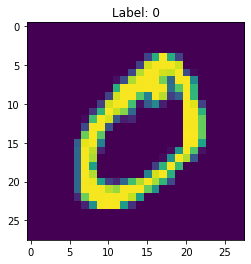

In [24]:
# Observing a sample
plt.imshow(train_images[1])
plt.title('Label: ' + str(train_labels[1]))

# Model 1

In [39]:
# Creating a model and layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(28, 28, 1), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
_________________________________________________

In [40]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 17s 9ms/step - loss: 2.2678 - accuracy: 0.5848
Epoch 2/25
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3366 - accuracy: 0.9110
Epoch 3/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2075 - accuracy: 0.9397
Epoch 4/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1549 - accuracy: 0.9547
Epoch 5/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1362 - accuracy: 0.9591
Epoch 6/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1303 - accuracy: 0.9618
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1187 - accuracy: 0.9637
Epoch 8/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1200 - accuracy: 0.9640
Epoch 9/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1083 - accuracy: 0.9675
Epoch 10/25
1875/1875 [==============================] - 16s 8ms/step - 

In [42]:
predictions1 = model.predict(test_images)

In [43]:
predictions1.shape

(10000, 10)

In [44]:
results1 = model.evaluate(test_images, test_labels)
print("test loss, test acc:", results1)

313/313 [==============================] - 1s 4ms/step - loss: 0.1196 - accuracy: 0.9682
test loss, test acc: [0.11956940591335297, 0.9682000279426575]


Accuracy of model 1 is 96.82%

# Model 2

In [31]:
# Creating a model and layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(28, 28, 1), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                25104     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 10)              

In [32]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 18s 9ms/step - loss: 2.6515 - accuracy: 0.3275
Epoch 2/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6159 - accuracy: 0.8022
Epoch 3/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3402 - accuracy: 0.9032
Epoch 4/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2891 - accuracy: 0.9185
Epoch 5/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2507 - accuracy: 0.9268
Epoch 6/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2385 - accuracy: 0.9304
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2061 - accuracy: 0.9405
Epoch 8/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1879 - accuracy: 0.9442
Epoch 9/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1806 - accuracy: 0.9473
Epoch 10/25
1875/1875 [==============================] - 16s 9ms/step - l

In [34]:
predictions2 = model.predict(test_images)

In [35]:
predictions2.shape

(10000, 10)

In [38]:
results2 = model.evaluate(test_images, test_labels)
print("test loss, test acc:", results2)

313/313 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 0.9729
test loss, test acc: [0.09164940565824509, 0.9728999733924866]


Accuracy of model 2 is 97.29%, which is better than the accuracy of model 1 (96.82%) so in this case our model has benefited from having an extra layer (the dense layer of 16 neurons)